<a href="https://colab.research.google.com/github/Hrushi1812/Technical-indicators/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=d5e5ad9458ce5cc3fc9e14f31982b2fa0f43546642a59a444fa8aff98e39d71e
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [2]:
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [34]:
df = pd.read_csv("MW-NIFTY-50-30-Jan-2024.csv")

stocks = df['SYMBOL \n'].tolist()

for i in range(1, len(stocks)):
    stocks[i] = stocks[i] + ".NS"

nifty_50_symbols = stocks[1:]

In [45]:
rsi_data = pd.DataFrame()
macd_data = pd.DataFrame()

In [70]:
for symbol in nifty_50_symbols:
    data = yf.download(symbol, start="2023-01-30", end="2024-01-30")

    # Calculate RSI over a longer period (1 year)
    rsi = ta.rsi(data['Close'], length=14)
    rsi_data[symbol] = rsi

    macd = ta.macd(data['Close'])
    macd_data[symbol] = macd['MACD_12_26_9']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [71]:
rsi_normalized = (rsi_data - rsi_data.min()) / (rsi_data.max() - rsi_data.min())
rsi_normalized = rsi_normalized.fillna(0)  # Fill NaN values with 0
rsi_ranks = (rsi_normalized * (len(rsi_data) - 1)).round().astype(int)

macd_normalized = (macd_data - macd_data.min()) / (macd_data.max() - macd_data.min())
macd_normalized = macd_normalized.fillna(0)  # Fill NaN values with 0
macd_ranks = (macd_normalized * (len(macd_data) - 1)).round().astype(int)

combined_ranks = rsi_ranks + macd_ranks

sorted_stocks = combined_ranks.sum().sort_values(ascending=False)

In [72]:
initial_capital = 1000000

num_top_stocks = 10

top_stocks = sorted_stocks.head(num_top_stocks)

capital_allocation = initial_capital / num_top_stocks

In [73]:
print("Top Stocks and Capital Allocation:")
print(top_stocks)
print("Capital Allocation per Stock:", capital_allocation)

Top Stocks and Capital Allocation:
TATAMOTORS.NS    58777
SBILIFE.NS       58251
INDUSINDBK.NS    57902
ONGC.NS          57785
DIVISLAB.NS      57206
ASIANPAINT.NS    56854
TATASTEEL.NS     56822
TITAN.NS         56810
SUNPHARMA.NS     56423
BAJFINANCE.NS    54503
dtype: int64
Capital Allocation per Stock: 100000.0


In [78]:
total_investment = 0
for symbol in top_stocks.index:
    data = yf.download(symbol, start="2023-01-30", end="2024-01-30")
    last_close_price = data['Close'].iloc[-1]
    shares_to_buy = capital_allocation / last_close_price
    investment_value = shares_to_buy * last_close_price
    print(f"Buy {shares_to_buy:.2f} shares of {symbol} at ${last_close_price:.2f} per share")
    total_investment += investment_value

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Buy 118.91 shares of TATAMOTORS.NS at $841.00 per share
Buy 70.50 shares of SBILIFE.NS at $1418.40 per share
Buy 65.50 shares of INDUSINDBK.NS at $1526.80 per share
Buy 396.04 shares of ONGC.NS at $252.50 per share
Buy 28.01 shares of DIVISLAB.NS at $3570.60 per share
Buy 33.60 shares of ASIANPAINT.NS at $2976.05 per share
Buy 740.74 shares of TATASTEEL.NS at $135.00 per share
Buy 25.86 shares of TITAN.NS at $3866.65 per share


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Buy 71.39 shares of SUNPHARMA.NS at $1400.85 per share
Buy 13.91 shares of BAJFINANCE.NS at $7191.65 per share


In [79]:
print("Total Investment:", total_investment)

Total Investment: 1000000.0


In [81]:
initial_capital = 1000000

capital_allocation_per_stock = initial_capital / len(nifty_50_symbols)

portfolio_values = []
daily_returns = []

for symbol in nifty_50_symbols:
    data = yf.download(symbol, start="2023-01-30", end="2024-01-30")
    closing_prices = data['Close']
    buy_price = closing_prices.iloc[0]  # Buy price is the closing price on the first day
    sell_price = closing_prices.iloc[-1]  # Sell price is the closing price on the last day
    shares_bought = capital_allocation_per_stock / buy_price  # Calculate shares bought
    portfolio_value = shares_bought * sell_price  # Calculate portfolio value at the end
    portfolio_values.append(portfolio_value)
    daily_return = (sell_price - buy_price) / buy_price  # Calculate daily return
    daily_returns.append(daily_return)

# Calculate total return of the benchmark
total_return = np.mean(daily_returns) * len(daily_returns)

# Calculate equity curve
equity_curve = np.cumsum(portfolio_values)

# Calculate maximum drawdown
cum_max = np.maximum.accumulate(equity_curve)
drawdown = (equity_curve - cum_max) / cum_max
max_drawdown = np.max(drawdown)

# Calculate and Plot Volatility
volatility = np.std(daily_returns) * np.sqrt(252)  # Annualized volatility
print("Total Return:", total_return)
print("Maximum Drawdown:", max_drawdown)
print("Volatility (Annualized):", volatility)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Total Return: 15.337454236221499
Maximum Drawdown: 0.0
Volatility (Annualized): 5.30679874689163


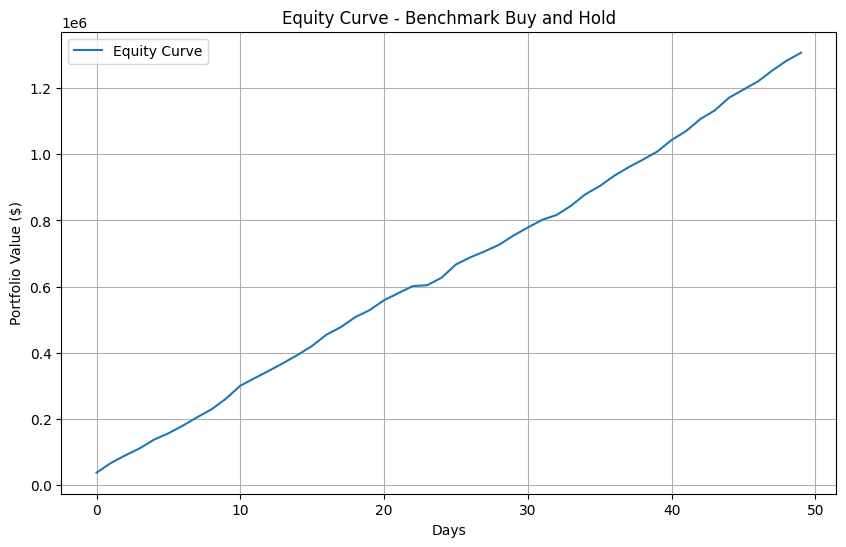

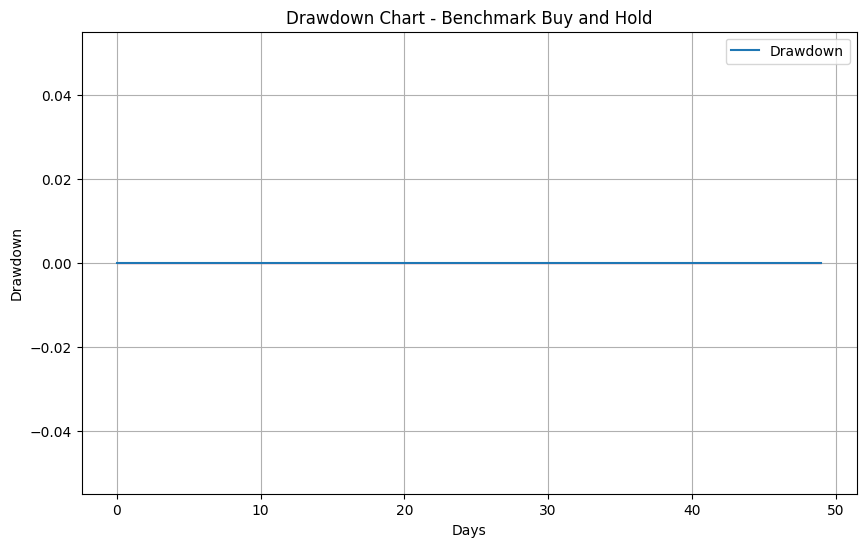

In [82]:
# Plot Equity Curve
plt.figure(figsize=(10, 6))
plt.plot(equity_curve, label='Equity Curve')
plt.title('Equity Curve - Benchmark Buy and Hold')
plt.xlabel('Days')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.show()

# Plot Drawdown Chart
plt.figure(figsize=(10, 6))
plt.plot(drawdown, label='Drawdown')
plt.fill_between(range(len(drawdown)), drawdown, 0, color='red', alpha=0.3)
plt.title('Drawdown Chart - Benchmark Buy and Hold')
plt.xlabel('Days')
plt.ylabel('Drawdown')
plt.legend()
plt.grid(True)
plt.show()